###  Data Prep and Exploration

Before we can carry out any real meaningful analysis using data we must always go through the process of making sure our dataset is clean and fit for purpose. We can then begin exploring the data itself to build initial intuition about the trends contained within the data that could help us answer further questions or guide us other downstream tasks such as modeling. 

aim here is:
using Pandas library to create clean data and develop a framework.

### Dataset

I will use a real world bank marketing dataset. The dataset contains information about customers who were contacted as part of a telephone marketing campaign trying to get customers to sign up for a term deposit product. The dataset also contains information about whether the customer has been contacted as part of the current marketing campaign or had been as part of a previous campaign. 

#### Data Dictionary

Data dictionary to give us better understaning the dataset:   
### Demographic Data for Client:
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education:Education Level (categorical)
### Banking Data for client
- default: Failed to make a payment? (categorical)
- balance: average yearly balance ( numerical)
- housing: Own vs Rent (Do they have a housing loan)? (categorical)
- loan: Do they have a loan with bank or not? (categorical)
### Field of Interest for client
Data about the calls from *this* campaign:
- contact: contact communication type ,Contact Method, last contact (categorical)
- month: last contact month of year, Last Date of contact with client (Month) (categorical)
- day: last contact day of the week, Last Date of contact with client (day) (categorical)
- duration: last contact duration, last contact duration in seconds (numeric)
- campaign:  number of contacts performed during this campaign and for this client (includes last contact) (numeric)
Data about calls from *previous* campaigns:
- previous:  number of contacts performed before this campaign and for this client. 0 means this client was not contacted in previous campaign(numeric)
- poutcome: outcome of the previous marketing campaign, previous campaign outcome (categorical) 
- Pday:  number of days that passed by after the client was last contacted from a previous campaign(-1 means client was not previously contacted)(categorical)
- y:  Client opened a Deposit Account(categorical)

Field of interest:(Hypothesis):
-     has the client opended Deposit account?

- y:  Client opened a Deposit Account(categorical)
- y:  Target : 'Deposit'  and 'No-Deposit'
  
### Question of interest


> How do customers who registered for the term deposit product differ from those who did not? This can be in terms of customer demographics or in terms of features of the current and prior marketing campaign. 

#### Business Objectives 
##### 1- Cost Reduction:
Telemarketing Cost: Bank pays internal employees or 3rd party call centers to conduct the marketing calls, therefore it is essential to target customer with higher chance of opening deposit
Reducing the number of calls made to uninterested or unsuitable prospects
Minimizing the number of unproductive calls helps in reducing wastage of human and financial resources.
##### 2- Increased Conversion Rates | Increase ROI (Return On Investment)
##### 3- Enhanced Customer Experience (CX):
Increase customer satisfaction rate (CSAT) 
Customers more likely to respond positively to calls that address their needs and interests
##### 4- Strategic Alignment
Market Positioning

### Enhance The Efficiency and Effectiveness of Telemarketing Campaigns 

##### 1- Develop a predictive model using historical data.
##### 2- Identify key factors that influence customer decisions.
##### 3- Provide actionable insights to marketing and sales teams.



In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
data = pd.read_csv('banking target.csv') # read dataset
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [217]:
data.shape

(45211, 17)

In [218]:
print(f'We have {data.shape[0]} rows and {data.shape[1]} columns')

We have 45211 rows and 17 columns


### Data Cleaning
Data cleaning can be broken down into three main areas:
* Check that datatypes and formatting is all correct.
* Check for duplicates.
* Check for null(missing) values.

I will go through each step

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [221]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [222]:
data[data['y'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


our y column shows that the clients that have deposit account, later I will change the name of column y, beacuse it is not clear.


#### Null Values

Next, we are going to deal with null values

In [225]:
# Returns a true/false array, true when there is a NaN value in the cell
data.isna()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [226]:
# Will sum down the columns to return the number of nulls per column
data.isna().sum()

# Will return the proportion of missing values for each column
data.isna().mean() * 100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

Dataset seems doesnot have Null value

**Age: -- Numeric**

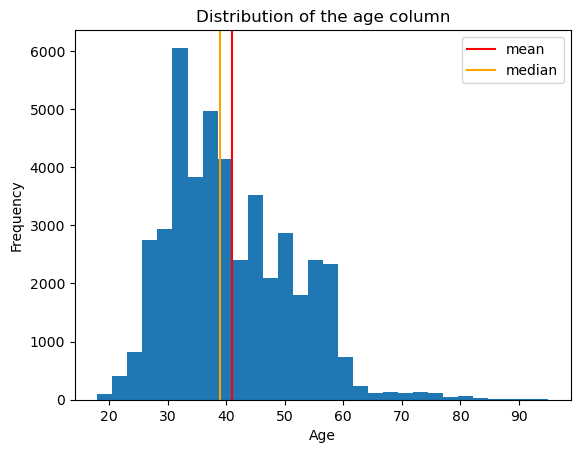

In [229]:
# plot the distribution of ages 

plt.figure()
plt.hist(data['age'], bins=30)   # sns.histplot()
plt.title('Distribution of the age column')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Plot mean and median
plt.axvline(data['age'].mean(), c='red', label='mean')
plt.axvline(data['age'].median(), c='orange', label='median')

plt.legend()
plt.show()

We can see a positive skew in the data. The majority of the customer-base is below the age of 40. The mean is pulled towards the older ages and away from the majority of the data. In this case, we would argue that the median is a better measure of central tendency. So we will use this to impute.

In [231]:
# imputing the nulls with .median() if we had , but here we do not have any null in our dataset!
#data['age'] = data['age'].fillna(data['age'].median()) # fillna() - fill missing values

#data['age'].isna().sum()

#### `Duration` - Numeric

In [233]:
df_missing_prop = data.isna().mean() * 100  # getting the proportion of the data missing 

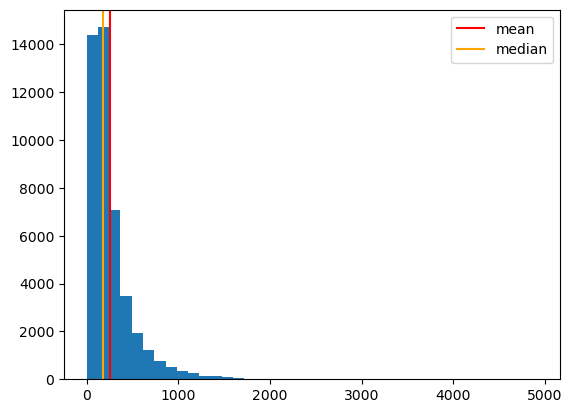

In [234]:
# Plot the distribution of the data
plt.figure()
plt.hist(data['duration'], bins=40)
plt.axvline(data['duration'].mean(), c='red', label='mean')
plt.axvline(data['duration'].median(), c='orange', label='median')
plt.legend()
plt.show()

once again, there is a strong positive skew, which would once again make the median the better option of the two.

In [236]:
print('Summary statistics prior to imputation', end='\n\n')

display(data['duration'].describe())

Summary statistics prior to imputation



count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

#### `job` -- Categorical

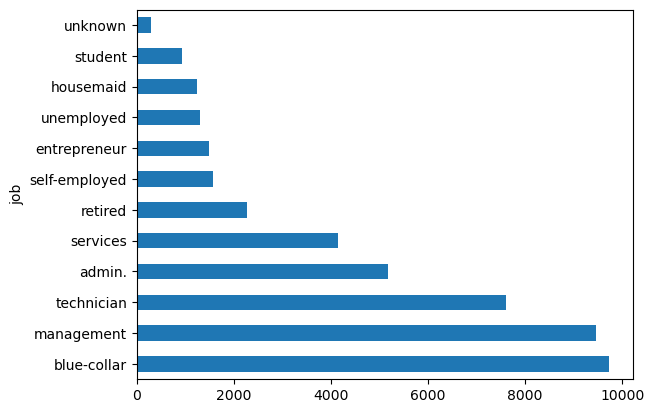

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [238]:
# Check the job column
data['job'].value_counts().plot(kind='barh')
plt.show()

display(data['job'].value_counts())

#### `marital` column - categorical 

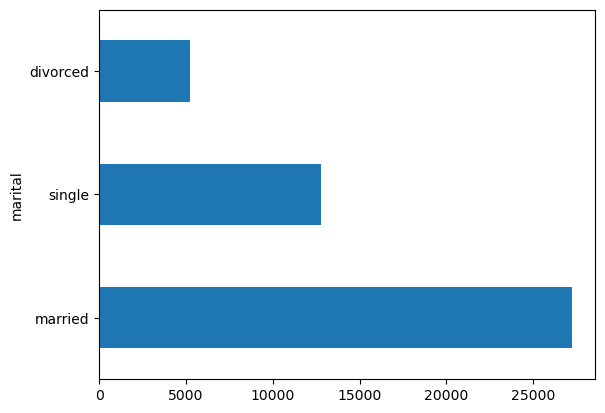

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [240]:
data['marital'].value_counts().plot(kind='barh')
plt.show()

display(data['marital'].value_counts())

#### `Education` column - categorical

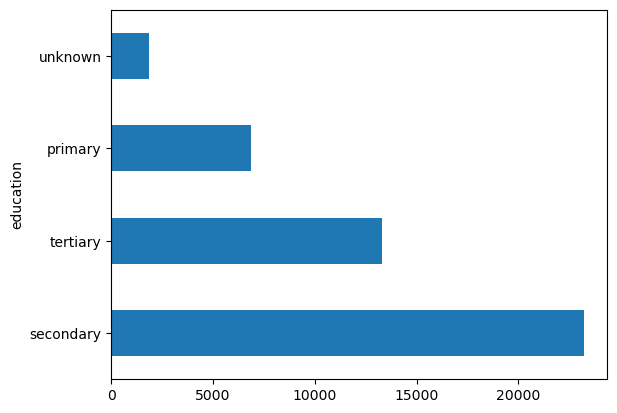

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [242]:
data['education'].value_counts().plot(kind='barh')
plt.show()

display(data['education'].value_counts())

#### Dealing with duplicate values

When dealing with duplicates, we want to make sure that we remove duplicate rows and duplicate columns. 

In [244]:
# use .duplicated() - returns true or false array row-wise 

# Sum the Trues to get total number of duplicate rows
print(data.duplicated().sum())

# Return the proportion of rows that are duplicates 
print(data.duplicated().mean())

0
0.0


In [245]:
# Using keep=False allows us to see some duplicate rows side by side 
data[data.duplicated(keep=False)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [246]:
# Sorting by age - this helps force duplicate rows to appear close to each other 
data[data.duplicated(keep=False)].sort_values('age').head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [247]:
# the .drop_duplicates() returns the entire dataframe without the duplicates row-wise
# Remember to reassign the change to a variable

data = data.drop_duplicates()

In [248]:
# check for duplicate values:
data.duplicated().sum()

0

Dataset doesnt have any duplicated rows

###  Check for duplicate columns

In [251]:
# Transposing the dataframe first to make the columns the rows 
data.T.duplicated()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [252]:
# it only returns the int or float datatype of our dataset.
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


looking at above,we can get better understanding of our data as: mean age for clients is almost ~40,min age in datase, max age in dataset,..
#switches our rows and columns for better understanding the dataset.
data.describe().T
#only the columns with object datatype. 'O':  object datatype
data.describe(include='O').T

In [254]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


I have cleaned the dataset!

### Saving the data

Now that we have spent the time cleaning and exploring this dataset. We are going to save it down to file for now. In a short while, we will be using our cleaned dataset to carry out some EDA work to learn more about the customer characteristics which drive product registration! To be continued.... 

In [257]:
data.to_csv('banking target.csv', index=False) # makes it not save an index col